In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import seaborn as sb
import numpy as np

Exercise 1)
a)

In [20]:
df = pd.read_excel("Downloads/breast-cancer-wisconsin.xlsx") #read the data set
df=df.interpolate(method='nearest') #interpolate missing values

In [21]:
df=df.drop("code", axis=1) #drop the code column
df.head()
features = df.loc[:, list(df)[:-1]].values #split the data into features set and class set
klasse = df.loc[:, ["class"]].values

In [4]:
features_scaled = StandardScaler().fit_transform(features) # scaling the features set

In [6]:
pca = PCA() # doing the actual pca
principalComponents = pca.fit_transform(features_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = [i for i in range(1,10)])

In [7]:
pca.fit(features_scaled) # fit teh data to the pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[ 65.4  74.   80.   85.2  89.4  92.8  96.1  99.  100. ]


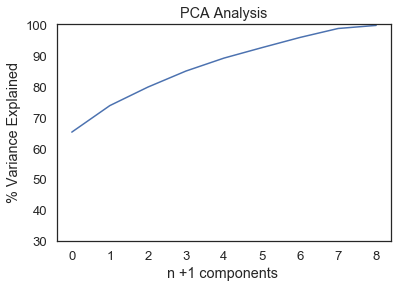

In [28]:
# plot the cumulated variance.
variance =pca.explained_variance_ratio_ # calculate variance ratios
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100) #rounded to percentage

plt.ylabel('% Variance Explained')
plt.xlabel('n +1 components ')
plt.xticks([i for i in range(10)])
plt.title('PCA Analysis')
plt.ylim(30,100.5)
print (var)
plt.plot(var)

In [ ]:
# the first 6 components are enough to cover >= 90 %.

b)

In [9]:
finalDf = pd.concat([principalDf, df[['class']]], axis = 1) #concatenate scaled features set and teh class set

In [10]:
finalDf.head()

,1,2,3,4,5,6,7,8,9,class
0,-1.458989,-0.103530,-0.577553,-0.023162,-0.151570,0.146176,0.300721,0.435618,-0.001557,2
1,1.457655,-0.553216,0.310822,-0.655750,1.691574,-0.561744,-0.924616,0.352840,0.012818,2
2,-1.582918,-0.073038,0.040621,-0.100203,-0.067063,-0.211299,0.273373,0.233932,0.015796,2
3,1.501772,-0.545678,-0.649455,1.431360,-0.447196,-0.159949,-0.236603,-1.593375,0.186781,2
4,-1.333143,-0.085412,0.028890,-0.300618,-0.151717,0.515047,0.160909,0.435507,-0.034480,2


In [12]:
first_five=finalDf.drop(columns=[6,7,8,9]) # drop the components 6,7,8,9 to keep the first five

In [17]:
first_five.head()

,1,2,3,4,5,class
0,-1.458989,-0.103530,-0.577553,-0.023162,-0.151570,2
1,1.457655,-0.553216,0.310822,-0.655750,1.691574,2
2,-1.582918,-0.073038,0.040621,-0.100203,-0.067063,2
3,1.501772,-0.545678,-0.649455,1.431360,-0.447196,2
4,-1.333143,-0.085412,0.028890,-0.300618,-0.151717,2


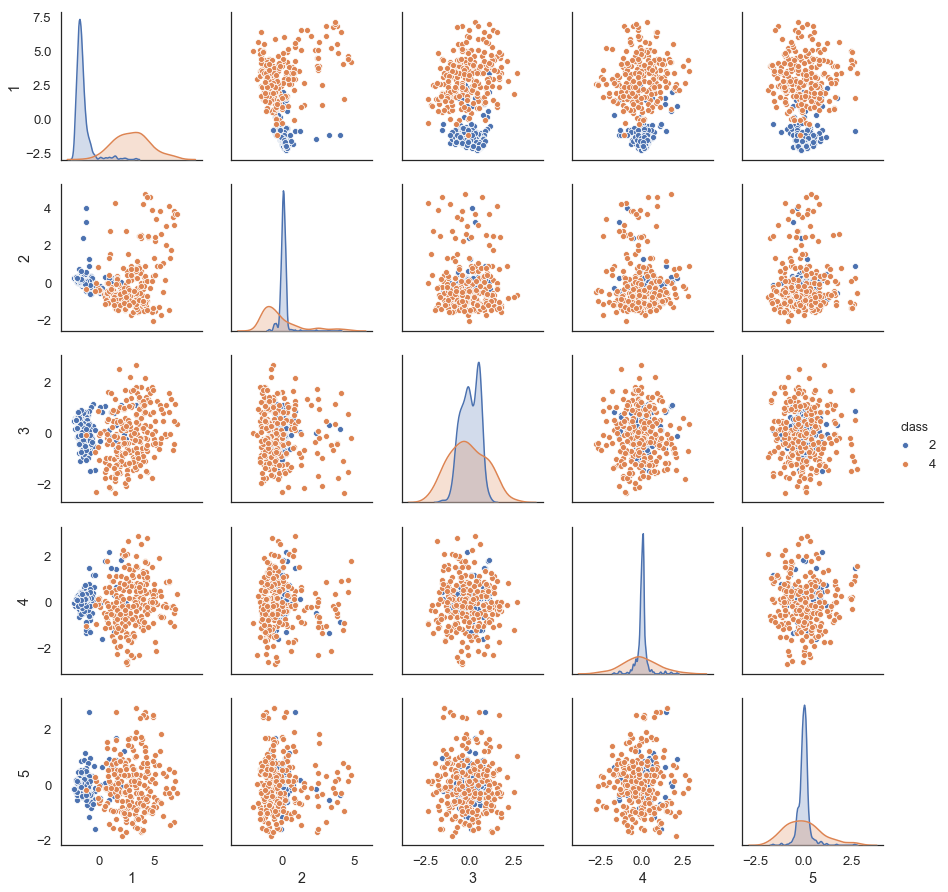

In [16]:
sb.pairplot(first_five,vars=[1,2,3,4,5], hue="class") #plot is using seaborn

c)

In [26]:
print (pca.explained_variance_)
print (pd.DataFrame(pca.components_,columns=list(df)[:-1]))

[5.89047615 0.77744685 0.53964716 0.46827076 0.38087324 0.30774761
 0.29723871 0.26212251 0.089071  ]
   thickness   uniCelS  uniCelShape    marAdh  epiCelSize   bareNuc  \
0   0.302844  0.381430     0.377742  0.333094    0.336632  0.331780   
1  -0.142161 -0.047669    -0.083087 -0.046233    0.164846 -0.256308   
2  -0.862991  0.012783    -0.040017  0.427623    0.103621  0.017284   
3  -0.106419  0.206584     0.178597 -0.449796    0.372007 -0.554646   
4  -0.069211  0.136537     0.103516 -0.035302    0.682886  0.128276   
5   0.254525  0.142858     0.066324  0.655310   -0.085412 -0.641377   
6  -0.065129  0.186261     0.133115 -0.232489   -0.174851 -0.267513   
7   0.241196 -0.439179    -0.584973  0.122137    0.448963 -0.109863   
8   0.002544  0.736734    -0.664741 -0.045680   -0.067884  0.069606   

   blaChroma   normNuc   mitoses  
0   0.346282  0.336174  0.229855  
1  -0.229701  0.025845  0.906741  
2   0.194083  0.121386 -0.084739  
3   0.000763  0.451138 -0.249472  
4  -0.255242

In [ ]:
# I am not sure what PCA "mode" means, but this would be my guess:
# The first component covers ~ 65 % of the variance. Its clearly visible in the first cell (index 1,1) of the plot.
# Regarding this component, we see that: 
# uniCelS shows the highest weight in the first principal component (~ 0.38)
# thickness reveals the lowest weight in the first principal component (0.30 )

d)

In [14]:
#outlier removal: row with index 1.
#Will probably not make any major difference. To archieve that, more outlier samples should be removed.
#Just to demonstrate:
first_five_removed=first_five.drop([1])

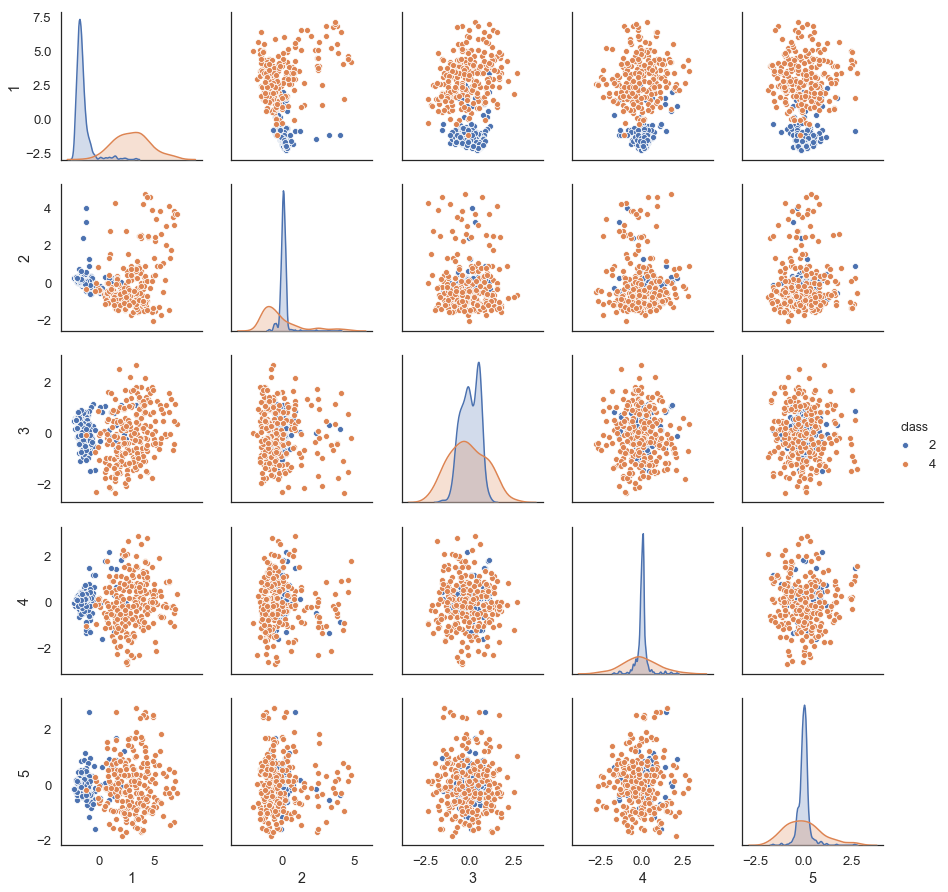

In [15]:
#replot
sb.pairplot(first_five,vars=[1,2,3,4,5], hue="class")

e)

Pre-processing is always necessary even for this dataset - that's why I've already made it as you can see in a).  
We're doing that in order to remove mathematically the sources of unwanted variations (QUOTED). 
If the relationships between the variables analyzed are non-linear, the values of correlation coefficients can be  lower. 
So, it is sometimes useful to transform the original variables prior to the Principal Component Analysis to "linearize" these relationships.